Meeopp Take Home Exercise


In [1]:
!pip install dash
!pip install jupyter-dash
!pip install plotly
!pip install dash dash-bootstrap-components plotly

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import dash
from dash import html, dcc
import plotly.express as px
import seaborn as sns

<ipython-input-1-421686ef056b>:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-421686ef056b>:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the data
# Define the paths to the CSV files
base_path = "/content/drive/MyDrive/Colab Notebooks/Meeopp/Meeopp_data/"
course_completion_path = base_path + "course_completion_data.csv"
feedback_data_path = base_path + "feedback_data.csv"
student_engagement_data_path = base_path + "student_engagement_data.csv"

# Load the CSV files into pandas DataFrames
course_completion_df = pd.read_csv(course_completion_path)
feedback_df = pd.read_csv(feedback_data_path)
student_engagement_df = pd.read_csv(student_engagement_data_path)

# Display the first few rows of each DataFrame to verify
print("Course Completion Data:")
print(course_completion_df.head(), "\n")
print("Feedback Data:")
print(feedback_df.head(), "\n")
print("Student Engagement Data:")
print(student_engagement_df.head())


Course Completion Data:
   LessonID  ExpectedDuration  CompletionRate
0         1          5.000000        1.000000
1         2          6.315789        0.868421
2         3          7.631579        0.736842
3         4          8.947368        0.605263
4         5         10.263158        0.500000 

Feedback Data:
   StudentID  LessonID  FeedbackScore FeedbackComment
0        892         1       5.000000            Poor
1         92         2       5.000000         Average
2        973         3       3.341522            Good
3        680         4       2.966321         Average
4        214         5       1.188239         Average 

Student Engagement Data:
   StudentID  LessonID  SessionTime
0        685        12     8.382814
1        560         1     8.664799
2        630         5    81.987520
3        193        14    11.947281
4        836        10    31.066121


In [4]:
display(course_completion_df)

,LessonID,ExpectedDuration,CompletionRate
0,1,5.000000,1.000000
1,2,6.315789,0.868421
2,3,7.631579,0.736842
3,4,8.947368,0.605263
4,5,10.263158,0.500000
5,6,11.578947,0.500000
6,7,12.894737,0.500000
7,8,14.210526,0.500000
8,9,15.526316,0.500000
9,10,16.842105,0.500000


In [5]:
display(feedback_df)

,StudentID,LessonID,FeedbackScore,FeedbackComment
0,892,1,5.000000,Poor
1,92,2,5.000000,Average
2,973,3,3.341522,Good
3,680,4,2.966321,Average
4,214,5,1.188239,Average
5,794,6,5.000000,Good
6,769,7,5.000000,Good
7,108,8,5.000000,Good
8,931,9,5.000000,Excellent
9,382,10,5.000000,Needs Improvement


In [6]:
display(student_engagement_df)

,StudentID,LessonID,SessionTime
0,685,12,8.382814
1,560,1,8.664799
2,630,5,81.987520
3,193,14,11.947281
4,836,10,31.066121
...,...,...,...
995,916,14,5.752034
996,163,10,48.883443
997,51,3,9.064625
998,243,10,14.625424


**Data checking**

In [7]:
# Check for missing values in each DataFrame
print("Missing Values in Course Completion Data:")
print(course_completion_df.isnull().sum(), "\n")

print("Missing Values in Feedback Data:")
print(feedback_df.isnull().sum(), "\n")

print("Missing Values in Student Engagement Data:")
print(student_engagement_df.isnull().sum())

Missing Values in Course Completion Data:
LessonID            0
ExpectedDuration    0
CompletionRate      0
dtype: int64 

Missing Values in Feedback Data:
StudentID          0
LessonID           0
FeedbackScore      0
FeedbackComment    0
dtype: int64 

Missing Values in Student Engagement Data:
StudentID      0
LessonID       0
SessionTime    0
dtype: int64


In [8]:
# Check data types
print(course_completion_df.dtypes, "\n")
print(feedback_df.dtypes, "\n")
print(student_engagement_df.dtypes)

LessonID              int64
ExpectedDuration    float64
CompletionRate      float64
dtype: object 

StudentID            int64
LessonID             int64
FeedbackScore      float64
FeedbackComment     object
dtype: object 

StudentID        int64
LessonID         int64
SessionTime    float64
dtype: object


In [9]:
# Checking for duplicates
print("Duplicate Rows in Course Completion Data:", course_completion_df.duplicated().sum())
print("Duplicate Rows in Feedback Data:", feedback_df.duplicated().sum())
print("Duplicate Rows in Student Engagement Data:", student_engagement_df.duplicated().sum())

Duplicate Rows in Course Completion Data: 0
Duplicate Rows in Feedback Data: 0
Duplicate Rows in Student Engagement Data: 0


In [29]:
# Checking number of unique students
num_unique_students = student_engagement_df['StudentID'].nunique()

print(f"Number of unique students: {num_unique_students}")


Number of unique students: 650


In [10]:
# Sorting student_engagement_df by SessionTime
sorted_student_engagement_df = student_engagement_df.sort_values(by='SessionTime')

# Display the DataFrame after sorting
display(sorted_student_engagement_df)


,StudentID,LessonID,SessionTime
847,171,14,5.001867
786,976,10,5.027580
600,843,19,5.038600
432,148,17,5.093586
551,412,8,5.097775
...,...,...,...
842,200,18,88.946790
492,787,19,89.080104
199,516,3,89.242227
561,618,17,89.385892


There don't appear to be any missing data or duplicate rows. The main problem appears to be that the feedback scores and the feeback comments don't match. My intuition is that the feedback comments are the correct ones, as they have much greater variability, whereas almost all the feedback scores are 5. The completion rate also has a lot of 0.5s, which looks suspicious.

In [11]:
# Mapping comments to scores
comment_score_map = {
    'Excellent': 5,
    'Good': 4,
    'Average': 3,
    'Needs Improvement': 2,
    'Poor': 1
}

# Applying the mapping to the DataFrame
feedback_df['FeedbackScore'] = feedback_df['FeedbackComment'].map(comment_score_map)


In [12]:
display(feedback_df)

,StudentID,LessonID,FeedbackScore,FeedbackComment
0,892,1,1,Poor
1,92,2,3,Average
2,973,3,4,Good
3,680,4,3,Average
4,214,5,3,Average
5,794,6,4,Good
6,769,7,4,Good
7,108,8,4,Good
8,931,9,5,Excellent
9,382,10,2,Needs Improvement


In [13]:
# Joining on student ID and Lesson ID
joined_df = pd.merge(student_engagement_df, feedback_df, how='inner', on=['StudentID', 'LessonID'])

# Display the first few rows to verify the join
display(joined_df)


,StudentID,LessonID,SessionTime,FeedbackScore,FeedbackComment


**Exploring the data**
Questions:
Which students are struggling, which means taking the longest time vs expected duration?
Which courses are most popular?
Where does a student rank in terms of time for a course?
Are courses where students take more than recommended more popular?

In [14]:
# Calculate frequency table for LessonID in student_engagement_df
lesson_id_frequency = student_engagement_df['LessonID'].value_counts()

# Display the frequency table
print(lesson_id_frequency)



18    61
17    61
20    61
5     57
8     57
16    56
6     55
12    51
13    51
2     50
11    50
19    48
7     46
15    46
1     45
3     45
14    44
4     44
9     39
10    33
Name: LessonID, dtype: int64


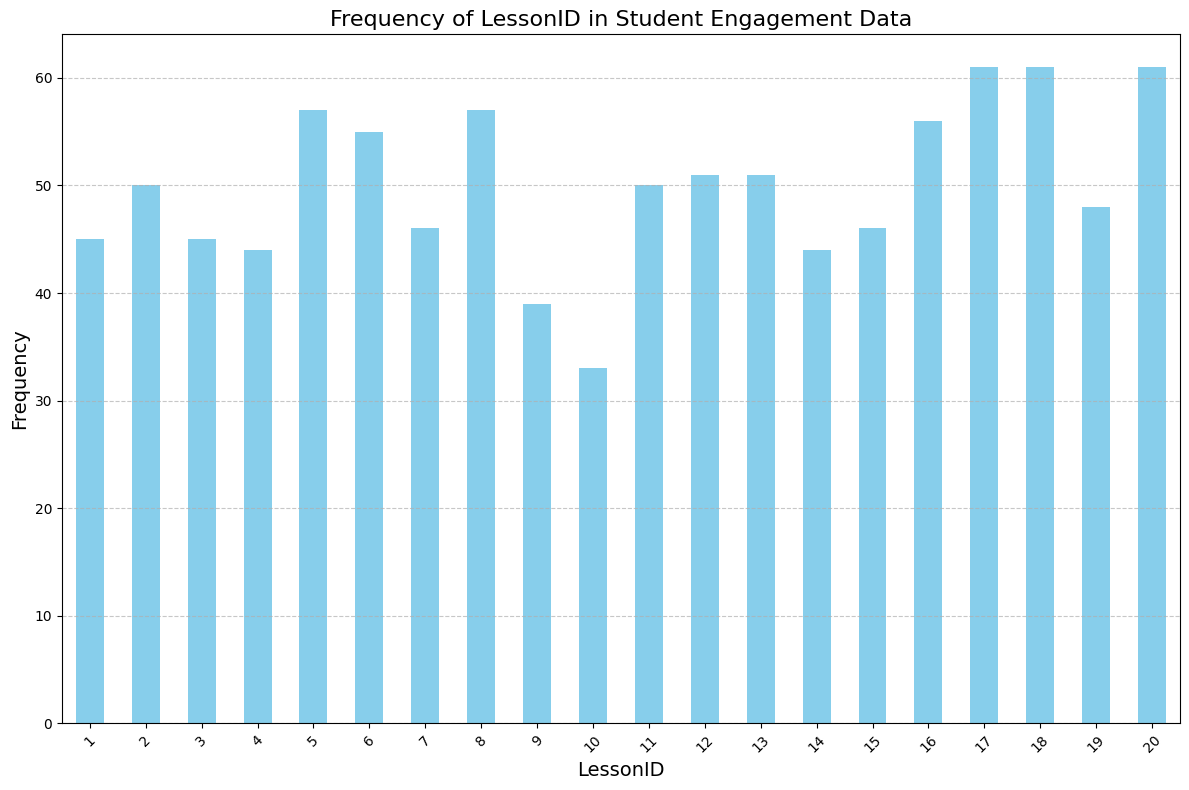

In [15]:
# Sorting the lesson_id_frequency Series by its index (LessonID) in ascending order
sorted_lesson_id_frequency = lesson_id_frequency.sort_index()

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Plotting the sorted frequency table as a bar graph
sorted_lesson_id_frequency.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Frequency of LessonID in Student Engagement Data', fontsize=16)
plt.xlabel('LessonID', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability if they overlap
plt.xticks(rotation=45)

# Add grid lines to the plot for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [16]:
# Convert sorted_lesson_id_frequency to a DataFrame
lesson_freq_df = sorted_lesson_id_frequency.reset_index()
lesson_freq_df.columns = ['LessonID', 'Frequency']

# Merge with course_completion_df on LessonID
merged_df = pd.merge(lesson_freq_df, course_completion_df, on='LessonID', how='inner')

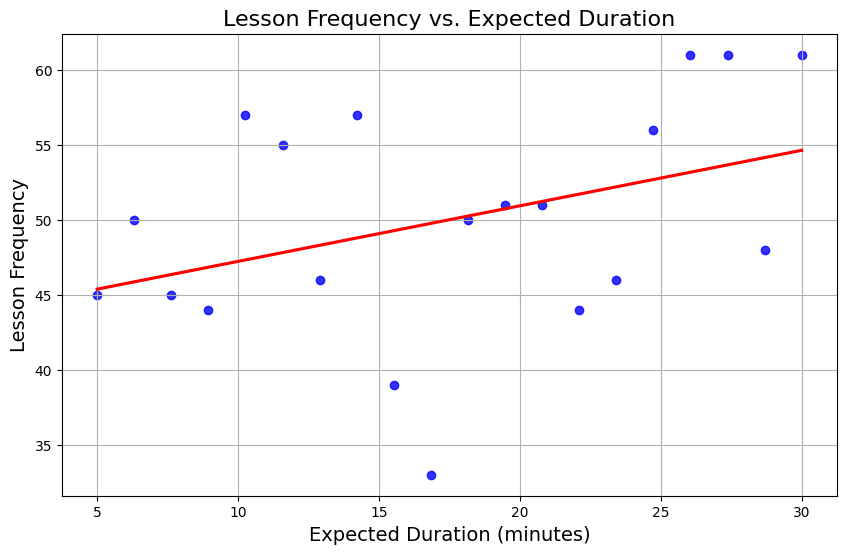

In [17]:


# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='ExpectedDuration', y='Frequency', data=merged_df, ci=None, color='blue', line_kws={'color': 'red'})

plt.title('Lesson Frequency vs. Expected Duration', fontsize=16)
plt.xlabel('Expected Duration (minutes)', fontsize=14)
plt.ylabel('Lesson Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [18]:
# Calculate Pearson correlation coefficient
correlation_matrix = merged_df[['Frequency', 'ExpectedDuration']].corr()
correlation_coefficient = correlation_matrix.loc['Frequency', 'ExpectedDuration']

print(f"The Pearson correlation coefficient between Lesson Frequency and Expected Duration is: {correlation_coefficient:.3f}")

The Pearson correlation coefficient between Lesson Frequency and Expected Duration is: 0.380


**Checking the engagement metrics**

In [19]:
# Group by LessonID and sum SessionTime for each LessonID
total_session_time_by_lesson = student_engagement_df.groupby('LessonID')['SessionTime'].sum()

# Display the total SessionTime for each LessonID
print(total_session_time_by_lesson)


LessonID
1     1433.099330
2     1829.051792
3     1852.237404
4     1524.528906
5     2170.770799
6     2454.813439
7     1341.638048
8     1564.477590
9     1083.036959
10     860.678710
11    1785.718606
12    1589.151059
13    1972.040561
14    1246.390271
15    1901.542224
16    2115.374461
17    2277.495918
18    2456.394704
19    1610.315105
20    2244.024166
Name: SessionTime, dtype: float64


In [20]:
# Group by LessonID and count unique StudentID entries for each LessonID
unique_students_by_lesson = student_engagement_df.groupby('LessonID')['StudentID'].nunique()

# Display the number of unique StudentIDs for each LessonID
print(unique_students_by_lesson)


LessonID
1     43
2     48
3     45
4     43
5     56
6     55
7     46
8     55
9     38
10    33
11    49
12    49
13    48
14    44
15    46
16    54
17    58
18    60
19    47
20    59
Name: StudentID, dtype: int64


In [21]:
# Filter feedback_df for StudentID 892
filtered_feedback_df = student_engagement_df[student_engagement_df['StudentID'] == 382]

# Display the filtered DataFrame
print(filtered_feedback_df)


     StudentID  LessonID  SessionTime
270        382        13    59.794671


I am interested to see if the time difference between the expected duration and the expected duration produces any interesting results, but there is not enough feedback from students.

In [32]:
# Perform a left join to merge the data on 'LessonID'
merged_df = pd.merge(student_engagement_df, course_completion_df[['LessonID', 'ExpectedDuration']],
                     on='LessonID', how='left')

# Calculate the new column 'TimeDifference' by subtracting 'SessionTime' from 'ExpectedDuration'
merged_df['TimeDifference'] = merged_df['ExpectedDuration'] - merged_df['SessionTime']

# Display the first few rows to verify the result
print(merged_df.head())


   StudentID  LessonID  SessionTime  ExpectedDuration  TimeDifference
0        685        12     8.382814         19.473684       11.090870
1        560         1     8.664799          5.000000       -3.664799
2        630         5    81.987520         10.263158      -71.724362
3        193        14    11.947281         22.105263       10.157982
4        836        10    31.066121         16.842105      -14.224015


In [33]:
# I know this doesn't make senese to do, but am checking out of completeness
# Calculate the mean TimeDifference for each StudentID
mean_time_diff_by_student = merged_df.groupby('StudentID')['TimeDifference'].mean().reset_index()

merged_feedback_time_diff = pd.merge(feedback_df, mean_time_diff_by_student, on='StudentID', how='inner')

# Create a scatter plot
fig = px.scatter(
    merged_feedback_time_diff,
    x='TimeDifference',
    y='FeedbackScore',
    title='Time Difference vs. Feedback Score',
    labels={
        'TimeDifference': 'Mean Time Difference (Expected Duration - Session Time)',
        'FeedbackScore': 'Feedback Score'
    },
    trendline='ols',  # Adds a trendline
)

# Customize the layout for a more professional appearance
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(title='Mean Time Difference'),
    yaxis=dict(title='Feedback Score'),
    font=dict(family='Arial, sans-serif', size=12, color='RebeccaPurple')
)

fig.show()


In [34]:
# Step 1: Calculate the average TimeDifference for each LessonID
average_time_diff_by_lesson = merged_df.groupby('LessonID')['TimeDifference'].mean().reset_index()
average_time_diff_by_lesson.columns = ['LessonID', 'AverageTimeDifference']

# Step 2: Calculate lesson_id_frequency if not already done
lesson_id_frequency = student_engagement_df['LessonID'].value_counts().reset_index()
lesson_id_frequency.columns = ['LessonID', 'Frequency']

# Step 3: Merge the average time difference with the lesson frequency
merged_time_diff_frequency = pd.merge(average_time_diff_by_lesson, lesson_id_frequency, on='LessonID', how='inner')

# Step 4: Create the scatter plot
fig = px.scatter(
    merged_time_diff_frequency,
    x='AverageTimeDifference',
    y='Frequency',
    title='Lesson Frequency vs. Average Time Difference',
    labels={
        'AverageTimeDifference': 'Average Time Difference',
        'Frequency': 'Lesson Frequency'
    },
    hover_data=['LessonID']  # Adds LessonID as hover info
)

# Customize the plot for a more professional look
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(title='Average Time Difference (minutes)'),
    yaxis=dict(title='Lesson Frequency'),
    font=dict(family='Arial, sans-serif', size=12, color='RebeccaPurple')
)

fig.show()


There do not seem to be any detectable trends in lesson popularity against average time difference.

In [31]:
import plotly.express as px

# Assuming course_completion_df is your DataFrame with 'ExpectedDuration' and 'CompletionRate' columns
fig = px.scatter(
    course_completion_df,
    x='ExpectedDuration',
    y='CompletionRate',
    title='Course Completion: Expected Duration vs. Completion Rate',
    labels={
        'ExpectedDuration': 'Expected Duration (minutes)',
        'CompletionRate': 'Completion Rate'
    },
    template='plotly_white',  # Use a clean template
    color_continuous_scale=px.colors.sequential.Viridis,  # Optional: for coloring points based on another column
)

# Customize the layout for a more professional appearance
fig.update_layout(
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    ),
    xaxis=dict(
        title='Expected Duration (minutes)',
        gridcolor='lightgray',  # Light grid lines can help readability without distracting
    ),
    yaxis=dict(
        title='Completion Rate',
        gridcolor='lightgray',
    ),
    plot_bgcolor='white',  # Ensure the background is white for a clean look
)

# Customize the marker appearance
fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()


In [22]:
# Calculate the average SessionTime for each LessonID
average_engagement_time = student_engagement_df.groupby('LessonID')['SessionTime'].mean().reset_index()
average_engagement_time.columns = ['LessonID', 'AverageSessionTime']


In [23]:
display(average_engagement_time)

,LessonID,AverageSessionTime
0,1,31.846652
1,2,36.581036
2,3,41.160831
3,4,34.648384
4,5,38.083698
5,6,44.632972
6,7,29.166045
7,8,27.446975
8,9,27.770178
9,10,26.081173


In [24]:
# Calculate the average FeedbackScore by LessonID
average_feedback_score = feedback_df.groupby('LessonID')['FeedbackScore'].mean().reset_index()
average_feedback_score.columns = ['LessonID', 'AverageFeedbackScore']

# Since CompletionRate by LessonID is already provided in course_completion_df, ensure it's ready
completion_rate = course_completion_df[['LessonID', 'CompletionRate']]

In [27]:


# Create Plotly Express figures
# Customizing the color of each bar graph
fig_engagement_time = px.bar(
    average_engagement_time, x='LessonID', y='AverageSessionTime',
    labels={'LessonID': 'Lesson ID', 'AverageSessionTime': 'Average Engagement Time (minutes)'},
    title='Average Engagement Time by Lesson ID',
    color_discrete_sequence=['#636EFA']  # Blue shades
)

fig_feedback = px.bar(
    average_feedback_score, x='LessonID', y='AverageFeedbackScore',
    labels={'LessonID': 'Lesson ID', 'AverageFeedbackScore': 'Average Feedback Score'},
    title='Average Feedback Score by Lesson ID',
    color_discrete_sequence=['#EF553B']  # Orange shades
)

fig_completion = px.bar(
    completion_rate, x='LessonID', y='CompletionRate',
    labels={'LessonID': 'Lesson ID', 'CompletionRate': 'Completion Rate'},
    title='Completion Rate by Lesson ID',
    color_discrete_sequence=['#00CC96']  # Green shades
)

# Customizing figures for a cohesive look
for fig in [fig_engagement_time, fig_feedback, fig_completion]:
    fig.update_layout(plot_bgcolor="white", paper_bgcolor="white", font=dict(size=12, color="black"))

# Create a Dash application
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of your app using Dash Bootstrap Components
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Meeopp Dashboard"), width=12)),

    dbc.Row([
        dbc.Col(dbc.Card([
            dbc.CardHeader("Average Engagement Time by Lesson ID"),
            dbc.CardBody([dcc.Graph(figure=fig_engagement_time)])
        ]), md=4),

        dbc.Col(dbc.Card([
            dbc.CardHeader("Average Feedback Score by Lesson ID"),
            dbc.CardBody([dcc.Graph(figure=fig_feedback)])
        ]), md=4),

        dbc.Col(dbc.Card([
            dbc.CardHeader("Completion Rate by Lesson ID"),
            dbc.CardBody([dcc.Graph(figure=fig_completion)])
        ]), md=4)
    ], className="mb-4"),
], fluid=True)


/usr/local/lib/python3.10/dist-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [28]:
app.run_server(mode='inline')

<IPython.core.display.Javascript object>